Stock Price Prediction Project
The challenge of this project is to accurately predict the future closing value of a given stock across a given period of time in the future. For this project I will use a Long Short Term Memory networks – usually just called “LSTMs” to predict the closing price of the AAPL stock using a dataset of past prices

In [4]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
key="613b5818bb5608fa31fd41a93ae9fea4fd221980"

data = pdr.get_data_tiingo('AAPL', api_key=key)
data.to_csv('AAPL.csv')


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [5]:
data=pd.read_csv('AAPL.csv')
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-11-06 00:00:00+00:00,174.25,174.990,171.72,172.365,34242566,41.341395,41.516962,40.741144,40.894172,136970264,0.00,1.0
1,AAPL,2017-11-07 00:00:00+00:00,174.81,175.250,173.60,173.910,23910914,41.474257,41.578648,41.187180,41.260729,95643656,0.00,1.0
2,AAPL,2017-11-08 00:00:00+00:00,176.24,176.240,174.33,174.660,23907639,41.813529,41.813529,41.360375,41.438669,95630556,0.00,1.0
3,AAPL,2017-11-09 00:00:00+00:00,175.88,176.095,173.14,175.110,28636531,41.728118,41.779127,41.078044,41.545433,114546124,0.00,1.0
4,AAPL,2017-11-10 00:00:00+00:00,174.67,175.380,174.27,175.110,25061183,41.590511,41.759568,41.495267,41.695279,100244732,0.63,1.0


In [6]:
n,p=data.shape
print(n,p)

1257 14


In [7]:
data.isnull().sum()*100/n

symbol         0.0
date           0.0
close          0.0
high           0.0
low            0.0
open           0.0
volume         0.0
adjClose       0.0
adjHigh        0.0
adjLow         0.0
adjOpen        0.0
adjVolume      0.0
divCash        0.0
splitFactor    0.0
dtype: float64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1257 non-null   object 
 1   date         1257 non-null   object 
 2   close        1257 non-null   float64
 3   high         1257 non-null   float64
 4   low          1257 non-null   float64
 5   open         1257 non-null   float64
 6   volume       1257 non-null   int64  
 7   adjClose     1257 non-null   float64
 8   adjHigh      1257 non-null   float64
 9   adjLow       1257 non-null   float64
 10  adjOpen      1257 non-null   float64
 11  adjVolume    1257 non-null   int64  
 12  divCash      1257 non-null   float64
 13  splitFactor  1257 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.6+ KB


In [9]:


print("\n")
print("Open   --- Mean :", np.mean(data['open']),  "  \t Std: ", np.std(data['open']),  "  \t Max: ", np.max(data['open']),  "  \t Min: ", np.min(data['open']))
print("High   --- Mean :", np.mean(data['high']),  "  \t Std: ", np.std(data['high']),  "  \t Max: ", np.max(data['high']),  "  \t Min: ", np.min(data['high']))
print("Low    --- Mean :", np.mean(data['low']),   "  \t Std: ", np.std(data['low']),   "  \t Max: ", np.max(data['low']),   "  \t Min: ", np.min(data['low']))
print("Close  --- Mean :", np.mean(data['close']), "  \t Std: ", np.std(data['close']), "  \t Max: ", np.max(data['close']), "  \t Min: ", np.min(data['close']))
print("Volume --- Mean :", np.mean(data['volume']),"  \t Std: ", np.std(data['volume']),"  \t Max: ", np.max(data['volume']),"  \t Min: ", np.min(data['volume']))



Open   --- Mean : 191.47555926809864   	 Std:  68.29221612789976   	 Max:  514.79   	 Min:  104.54
High   --- Mean : 193.73206571201274   	 Std:  69.21580533113259   	 Max:  515.14   	 Min:  110.19
Low    --- Mean : 189.43750668257755   	 Std:  67.58580434330878   	 Max:  500.33   	 Min:  103.1
Close  --- Mean : 191.7036276849642   	 Std:  68.57896365542653   	 Max:  506.09   	 Min:  106.84
Volume --- Mean : 61021105.00954654   	 Std:  40995995.315369666   	 Max:  332607163   	 Min:  11362045


In [10]:
df= data.drop(['high','adjClose','adjHigh','adjLow','adjOpen','adjVolume','divCash','splitFactor'], axis= 1)
print(df.head())
print(df.tail())


  symbol                       date   close     low     open    volume
0   AAPL  2017-11-06 00:00:00+00:00  174.25  171.72  172.365  34242566
1   AAPL  2017-11-07 00:00:00+00:00  174.81  173.60  173.910  23910914
2   AAPL  2017-11-08 00:00:00+00:00  176.24  174.33  174.660  23907639
3   AAPL  2017-11-09 00:00:00+00:00  175.88  173.14  175.110  28636531
4   AAPL  2017-11-10 00:00:00+00:00  174.67  174.27  175.110  25061183
     symbol                       date   close     low     open     volume
1252   AAPL  2022-10-27 00:00:00+00:00  144.80  144.13  148.070  109180150
1253   AAPL  2022-10-28 00:00:00+00:00  155.74  147.82  148.200  164762371
1254   AAPL  2022-10-31 00:00:00+00:00  153.34  151.92  153.155   97943171
1255   AAPL  2022-11-01 00:00:00+00:00  150.65  149.13  155.080   80379345
1256   AAPL  2022-11-02 00:00:00+00:00  145.03  145.00  148.945   93604623


In [11]:
n,p=df.shape
print(n,p)

1257 6


In [14]:
# correlation read
corr = df.corr()
#pd.plotting.scatter_matrix(corr);
corr

,close,low,open,volume
close,1.000000,0.999447,0.998916,-0.465053
low,0.999447,1.000000,0.999462,-0.473903
open,0.998916,0.999462,1.000000,-0.463738
volume,-0.465053,-0.473903,-0.463738,1.000000


<AxesSubplot: >

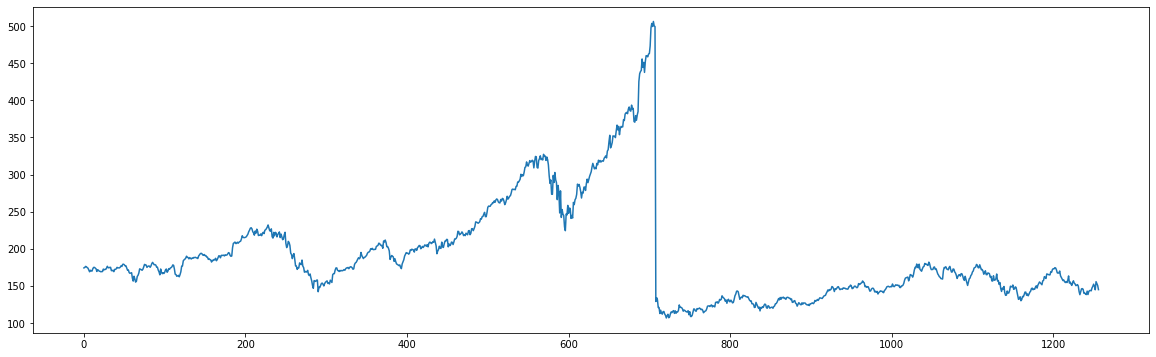

In [15]:
# visualisation
plt.figure(figsize=(20,6))
df['close'].plot()


In [16]:
df=df.reset_index()['close']


In [17]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0, 1))
df = scalar.fit_transform(df.to_numpy().reshape(-1, 1))

In [18]:
 print(df)

[[0.16884158]
 [0.17024421]
 [0.17382592]
 ...
 [0.11646838]
 [0.10973075]
 [0.09565435]]


In [19]:
#training and test set
training_size=int(len(df)*0.63)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size],df[training_size:len(df)]
print(train_data.shape, test_data.shape)

(791, 1) (466, 1)


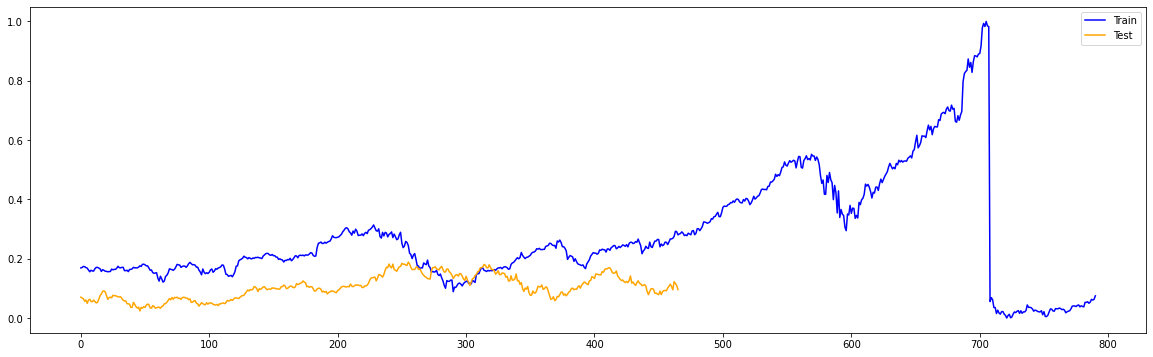

In [20]:
#visualisation
plt.figure(figsize=(20,6))
plt.plot(train_data, 'blue', test_data, 'orange')
plt.legend(["Train","Test"])
plt.show()

In [21]:

# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)



In [22]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
print(X_train.shape), print(y_train.shape)



(690, 100)
(690,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)



(365, 100)
(365,)


(None, None)

In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [25]:
from tensorflow import keras

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
#from keras.models import *



In [27]:
model = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 200) 

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-11-03 20:58:35.956829: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-03 20:58:35.956984: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/100


2022-11-03 20:58:36.655909: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-03 20:58:39.049364: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-03 20:58:39.448061: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-03 20:58:39.643304: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-03 20:58:39.798824: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-03 20:58:39.949412: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-03 20:58:40.152691: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114

4/4 [==============================] - 6s 554ms/step - loss: 0.0855
Epoch 2/100
4/4 [==============================] - 0s 95ms/step - loss: 0.0337
Epoch 3/100
4/4 [==============================] - 0s 94ms/step - loss: 0.0211
Epoch 4/100
4/4 [==============================] - 0s 98ms/step - loss: 0.0241
Epoch 5/100
4/4 [==============================] - 0s 94ms/step - loss: 0.0182
Epoch 6/100
4/4 [==============================] - 0s 94ms/step - loss: 0.0188
Epoch 7/100
4/4 [==============================] - 0s 95ms/step - loss: 0.0152
Epoch 8/100
4/4 [==============================] - 0s 95ms/step - loss: 0.0151
Epoch 9/100
4/4 [==============================] - 0s 98ms/step - loss: 0.0138
Epoch 10/100
4/4 [==============================] - 0s 100ms/step - loss: 0.0129
Epoch 11/100
4/4 [==============================] - 0s 100ms/step - loss: 0.0144
Epoch 12/100
4/4 [==============================] - 0s 100ms/step - loss: 0.0129
Epoch 13/100
4/4 [==============================] - 0s 94

In [28]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
11/11 [==============================] - ETA: 0s - loss: 0.0026

2022-11-03 20:59:26.164851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-03 20:59:26.306844: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-03 20:59:26.448624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-03 20:59:26.606390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-03 20:59:26.754898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 6s 417ms/step - loss: 0.0026 - val_loss: 3.2477e-04
Epoch 2/100
11/11 [==============================] - 1s 122ms/step - loss: 0.0036 - val_loss: 0.0010
Epoch 3/100
11/11 [==============================] - 1s 121ms/step - loss: 0.0035 - val_loss: 5.0842e-04
Epoch 4/100
11/11 [==============================] - 1s 117ms/step - loss: 0.0031 - val_loss: 5.6325e-04
Epoch 5/100
11/11 [==============================] - 1s 117ms/step - loss: 0.0031 - val_loss: 3.0439e-04
Epoch 6/100
11/11 [==============================] - 1s 116ms/step - loss: 0.0027 - val_loss: 6.3554e-04
Epoch 7/100
11/11 [==============================] - 1s 116ms/step - loss: 0.0038 - val_loss: 0.0016
Epoch 8/100
11/11 [==============================] - 1s 118ms/step - loss: 0.0050 - val_loss: 5.7585e-04
Epoch 9/100
11/11 [==============================] - 1s 117ms/step - loss: 0.0084 - val_loss: 4.7904e-04
Epoch 10/100
11/11 [==============================] - 2s 148ms/step - loss:

In [29]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_2 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [30]:
predicted_stock_price = model.predict(X_test[:-30]) # est prédit jusqu'à -30 jours de la fin du test set
predicted_stock_price = scalar.inverse_transform(predicted_stock_price)
print(predicted_stock_price.shape)

2022-11-03 21:01:34.417537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-03 21:01:34.562025: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-03 21:01:34.714064: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-03 21:01:34.855208: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 1/11 [=>............................] - ETA: 12s

2022-11-03 21:01:34.999915: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 2s 91ms/step
(335, 1)


In [31]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

12/12 [==============================] - 1s 84ms/step


In [32]:
train_predict=scalar.inverse_transform(train_predict)
test_predict=scalar.inverse_transform(test_predict)


In [33]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

235.8717321294232

In [34]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

156.0030976932948

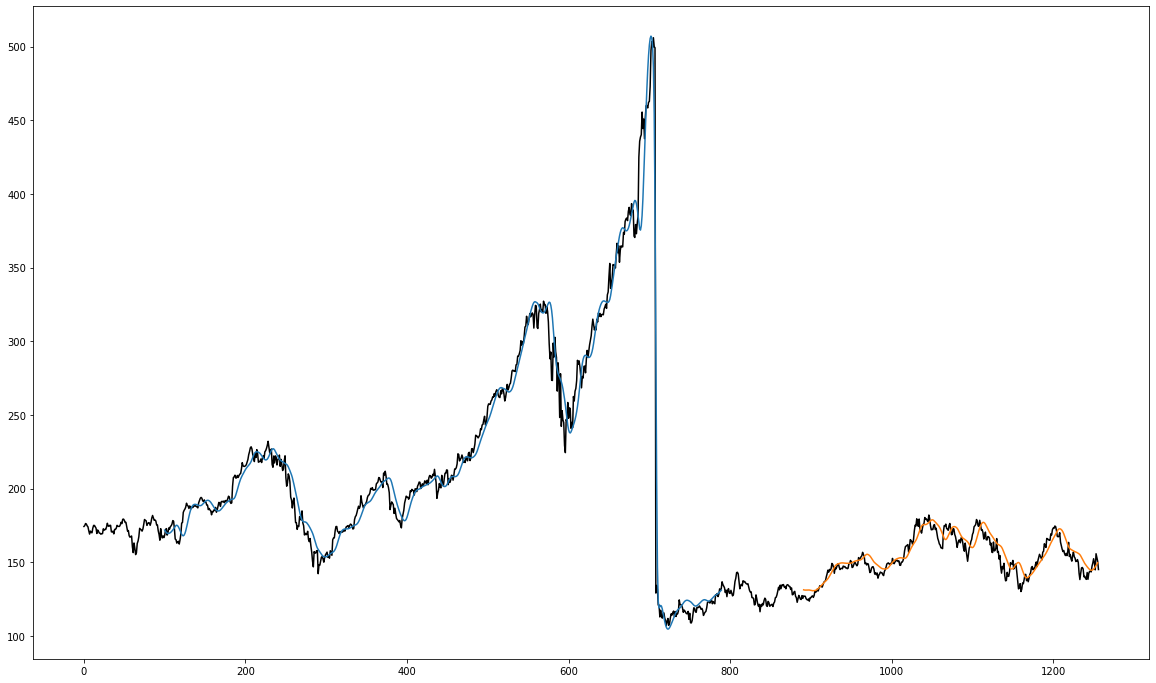

In [35]:
### Plotting 
# shift train predictions for plotting
from turtle import title


look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(20,12))
plt.plot( scalar.inverse_transform(df), color = 'black')
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()